In [1]:
import pandas as pd
import numpy as np
import random
import os
from sklearn.preprocessing import LabelEncoder

pd.set_option("display.max_column",None)

import warnings
warnings.filterwarnings(action='ignore') 

## 목표 : 시공간 정보로부터 사고위험도(ECLO) 예측 AI 모델 개발

In [2]:
train_org = pd.read_csv("open/train.csv")
test_org = pd.read_csv("open/test.csv")

#display 내장 함수 사용, 상위 5개 데이터 출력 
print(train_org.shape)
display(train_org.head())
print(test_org.shape)
display(test_org.head())

(39609, 23)


,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,승용,여,51세,상해없음,보행자,여,70세,중상,0,1,0,0,5
1,ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,승용,남,39세,상해없음,보행자,남,61세,경상,0,0,1,0,3
2,ACCIDENT_00002,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,승용,남,70세,상해없음,보행자,남,38세,경상,0,0,1,0,3
3,ACCIDENT_00003,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,승용,남,49세,상해없음,승용,남,36세,중상,0,1,0,0,5
4,ACCIDENT_00004,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,승용,남,30세,상해없음,승용,남,52세,경상,0,0,1,0,3


(10963, 8)


,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형
0,ACCIDENT_39609,2022-01-01 01,토요일,맑음,대구광역시 수성구 상동,교차로 - 교차로안,건조,차대사람
1,ACCIDENT_39610,2022-01-01 01,토요일,맑음,대구광역시 수성구 지산동,단일로 - 기타,건조,차대사람
2,ACCIDENT_39611,2022-01-01 04,토요일,맑음,대구광역시 수성구 수성동2가,교차로 - 교차로안,건조,차대차
3,ACCIDENT_39612,2022-01-01 04,토요일,맑음,대구광역시 수성구 신매동,단일로 - 기타,건조,차대차
4,ACCIDENT_39613,2022-01-01 06,토요일,맑음,대구광역시 달서구 감삼동,교차로 - 교차로안,건조,차대차


In [3]:
# 원본데이터 변형을 막기 위해 새로운 리스트로 저장
train_df = train_org.copy()
train_df["ECLO"] = train_org["ECLO"]
train_df.head()

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,승용,여,51세,상해없음,보행자,여,70세,중상,0,1,0,0,5
1,ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,승용,남,39세,상해없음,보행자,남,61세,경상,0,0,1,0,3
2,ACCIDENT_00002,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,승용,남,70세,상해없음,보행자,남,38세,경상,0,0,1,0,3
3,ACCIDENT_00003,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,승용,남,49세,상해없음,승용,남,36세,중상,0,1,0,0,5
4,ACCIDENT_00004,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,승용,남,30세,상해없음,승용,남,52세,경상,0,0,1,0,3


In [4]:
#데이터 분석을 위한 요소 출력 
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39609 entries, 0 to 39608
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           39609 non-null  object
 1   사고일시         39609 non-null  object
 2   요일           39609 non-null  object
 3   기상상태         39609 non-null  object
 4   시군구          39609 non-null  object
 5   도로형태         39609 non-null  object
 6   노면상태         39609 non-null  object
 7   사고유형         39609 non-null  object
 8   사고유형 - 세부분류  39609 non-null  object
 9   법규위반         39609 non-null  object
 10  가해운전자 차종     39609 non-null  object
 11  가해운전자 성별     39609 non-null  object
 12  가해운전자 연령     39609 non-null  object
 13  가해운전자 상해정도   39609 non-null  object
 14  피해운전자 차종     38618 non-null  object
 15  피해운전자 성별     38618 non-null  object
 16  피해운전자 연령     38618 non-null  object
 17  피해운전자 상해정도   38618 non-null  object
 18  사망자수         39609 non-null  int64 
 19  중상자수         39609 non-nu

In [5]:
#한글표시 오류를 잡기 위한 font 설정
from matplotlib import font_manager, rc
font_path = 'C:\\Users\\USER\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumSquare_0.ttf'
font=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font)

※ ECLO(Equivalent Casualty Loss Only) : 인명피해 심각도

ECLO = 사망자수 * 10 + 중상자수 * 5 + 경상자수 * 3 + 부상자수 * 1
본 대회에서는 사고의 위험도를 인명피해 심각도로 측정

# 각 요소와 ECLO사이의 관계 출력
ECLO :  인명피해 심각도
## 요일 - ECLO
: 토요일, 일요일의 ECLO지수가 상대적으로 높다.
## 기상상태 - ECLO
: 안개 낀 날의 ECLO 지수가 상대적으로 높다.
## 도로형태  - ECLO
: 단일로-터널, 단일로 - 고가도로위 의 ECLO 지수가 상대적으로 높다.
## 노면 상태  - ECLO
: 침수의 ECLO 지수가 상대적으로 높다.
## 사고유형  - ECLO
: 차대차의 ECLO 지수가 상대적으로 높다. 그 중에서 세부적으로 전도전복의 전복과 도로와이탈의 추락이 높다.
## 가해운전자의 상해정도 / 피해운전자의 상해정도 - ECLO
: 사망의 ECLO 지수가 상대적으로 높다.
## 가해운전자의 차종 -ECLO
: 건설기계의 ECLO지수가 상대적으로 높다.
## 피해운전자의 차종 - ECLO
: 농기계의 ECLO 지수가 상대적으로 높다.
## 가해운전자/피운전자의 성별 - ECLO
: 상대적으로 ECLO지수가 비슷하다.
## 법규위반  - ECLO
: 과속의 ECLO 지수가 상대적으로 높다.

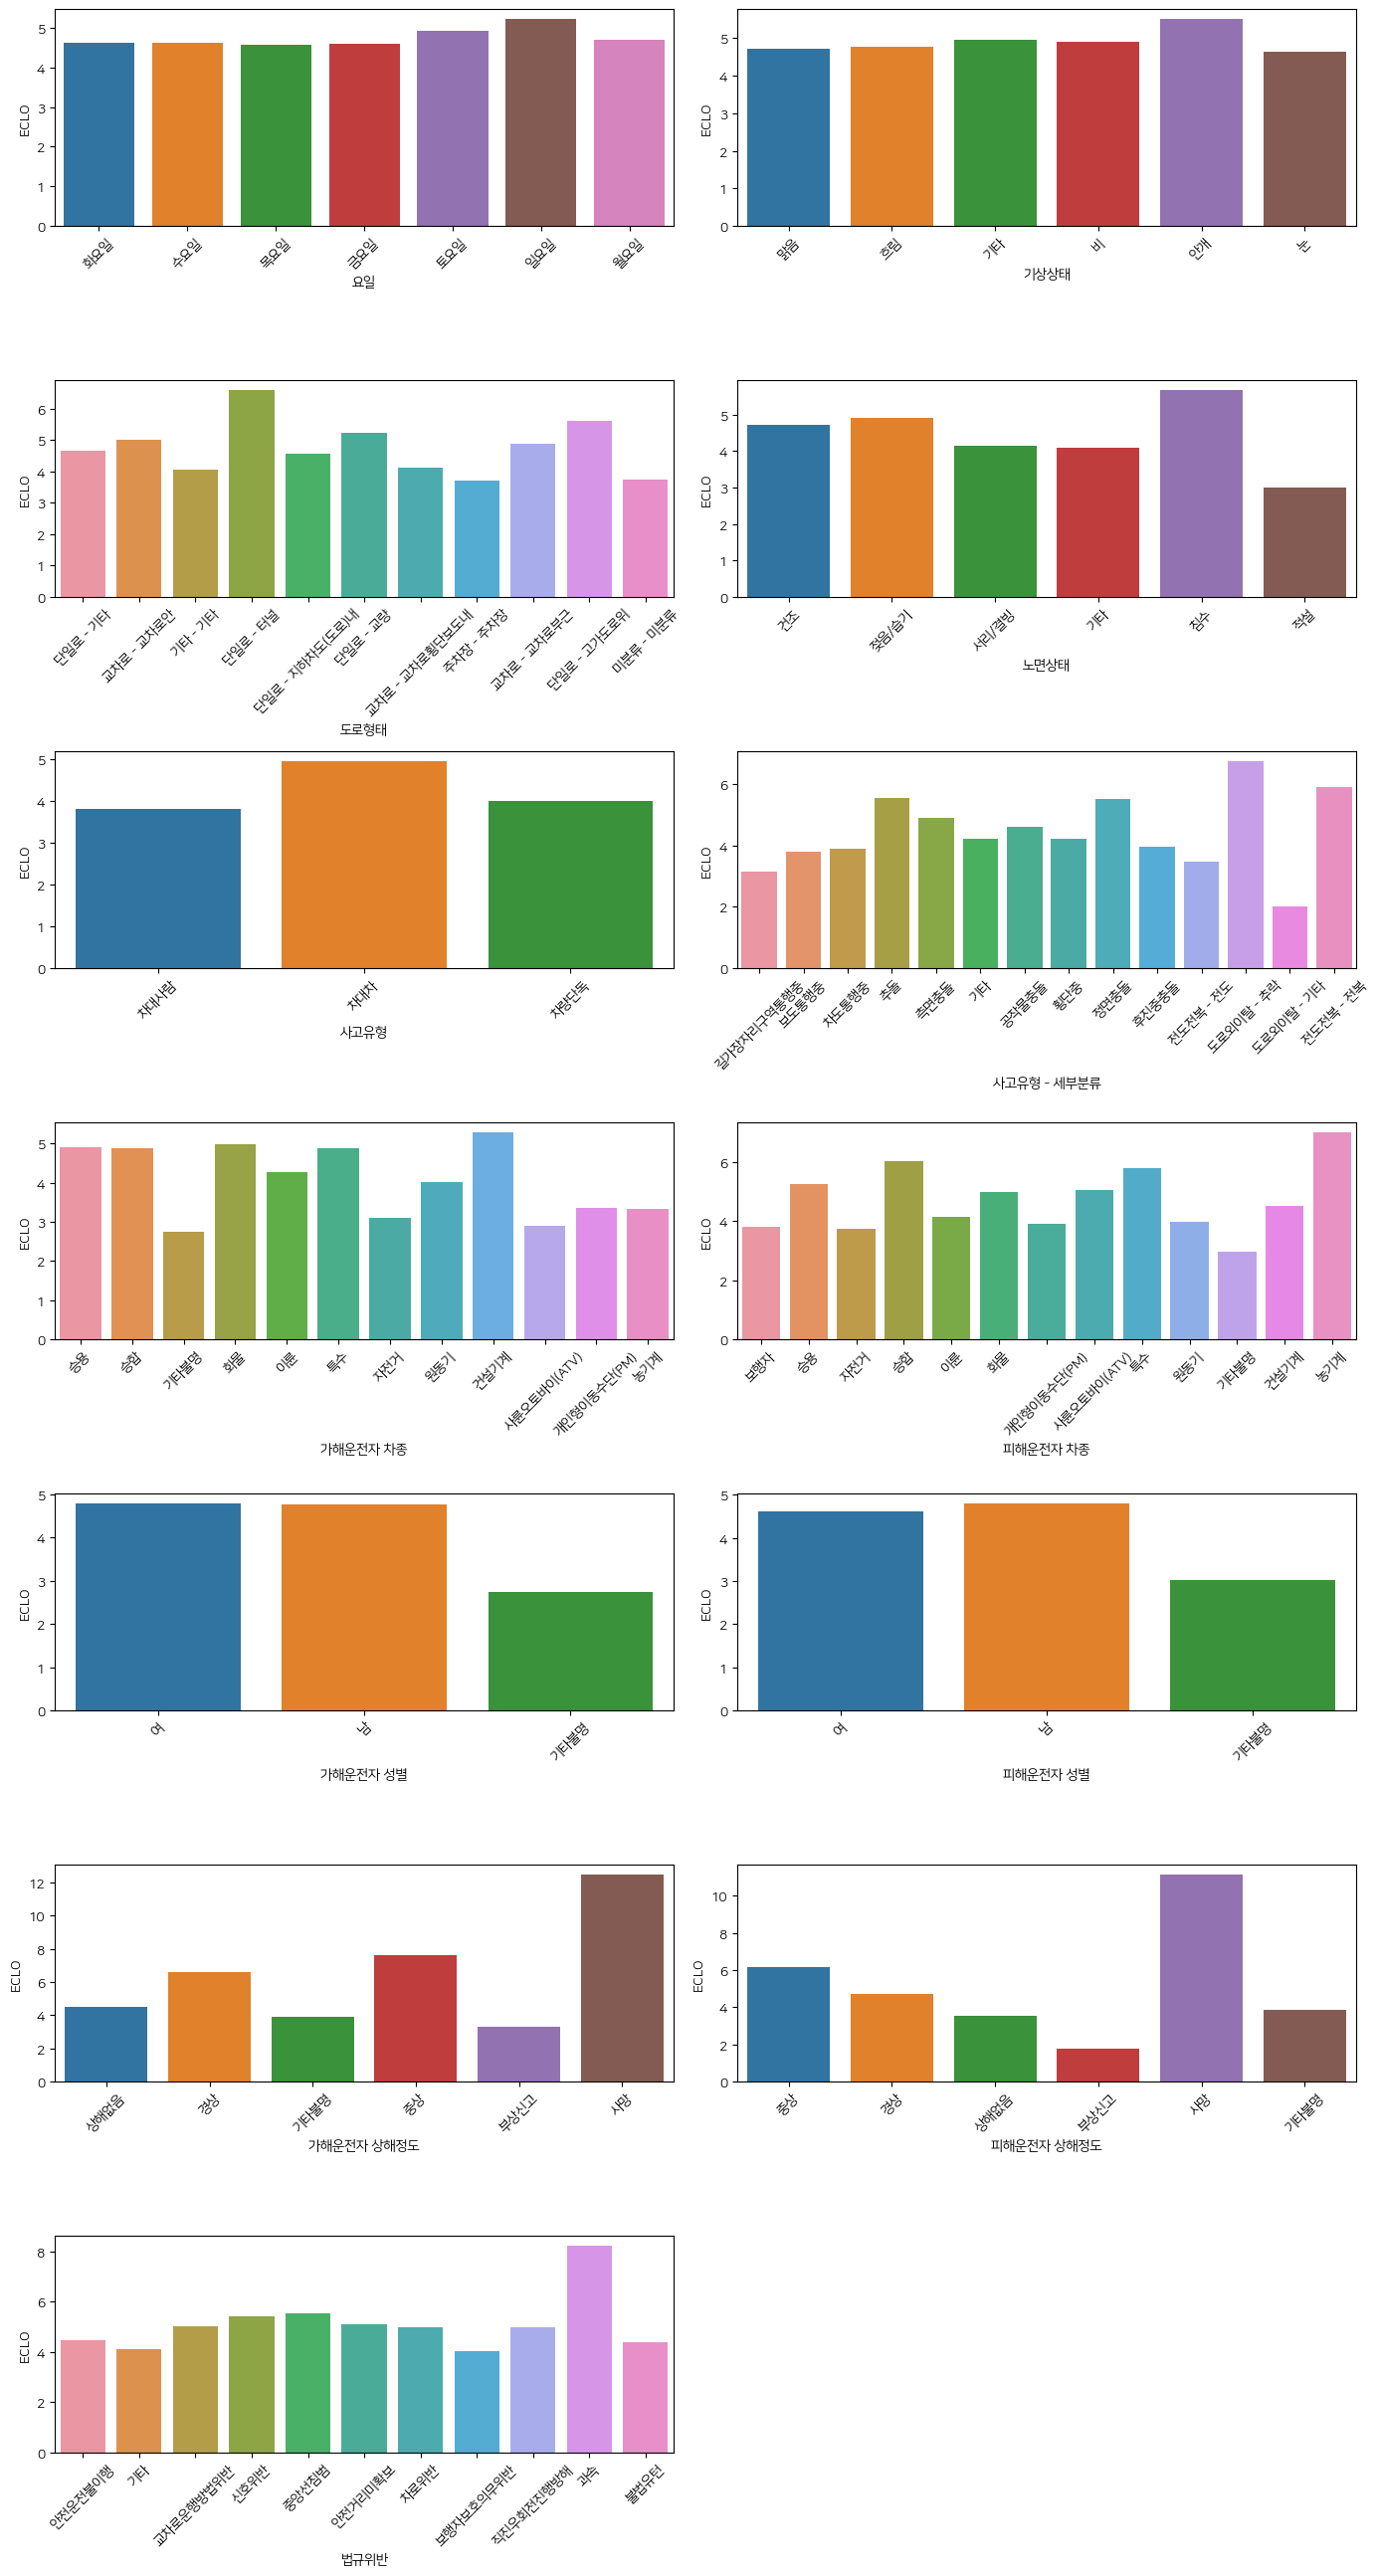

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
i = 0 
plt.figure(figsize=(14,26))
for col in ['요일',
 '기상상태',
 '도로형태',
 '노면상태',
 '사고유형',
 '사고유형 - 세부분류',
 '가해운전자 차종',
 '피해운전자 차종',
 '가해운전자 성별',
 '피해운전자 성별',
 '가해운전자 상해정도',  
 '피해운전자 상해정도',
 '법규위반',]:
    i += 1
    plt.subplot(7,2,i)
    sns.barplot(x=train_df[col], y=train_df['ECLO'],ci=None)
    plt.xticks(rotation=45)
plt.tight_layout()

## 도로 유형에 따른 사고 유형 시각화 
: 대체적으로 차대차 사고유형에서 ECLO가 높게 나타났고, 차대사람의 사고 유형 역시 ECLO가 높은 것을 확인할 수 있다.


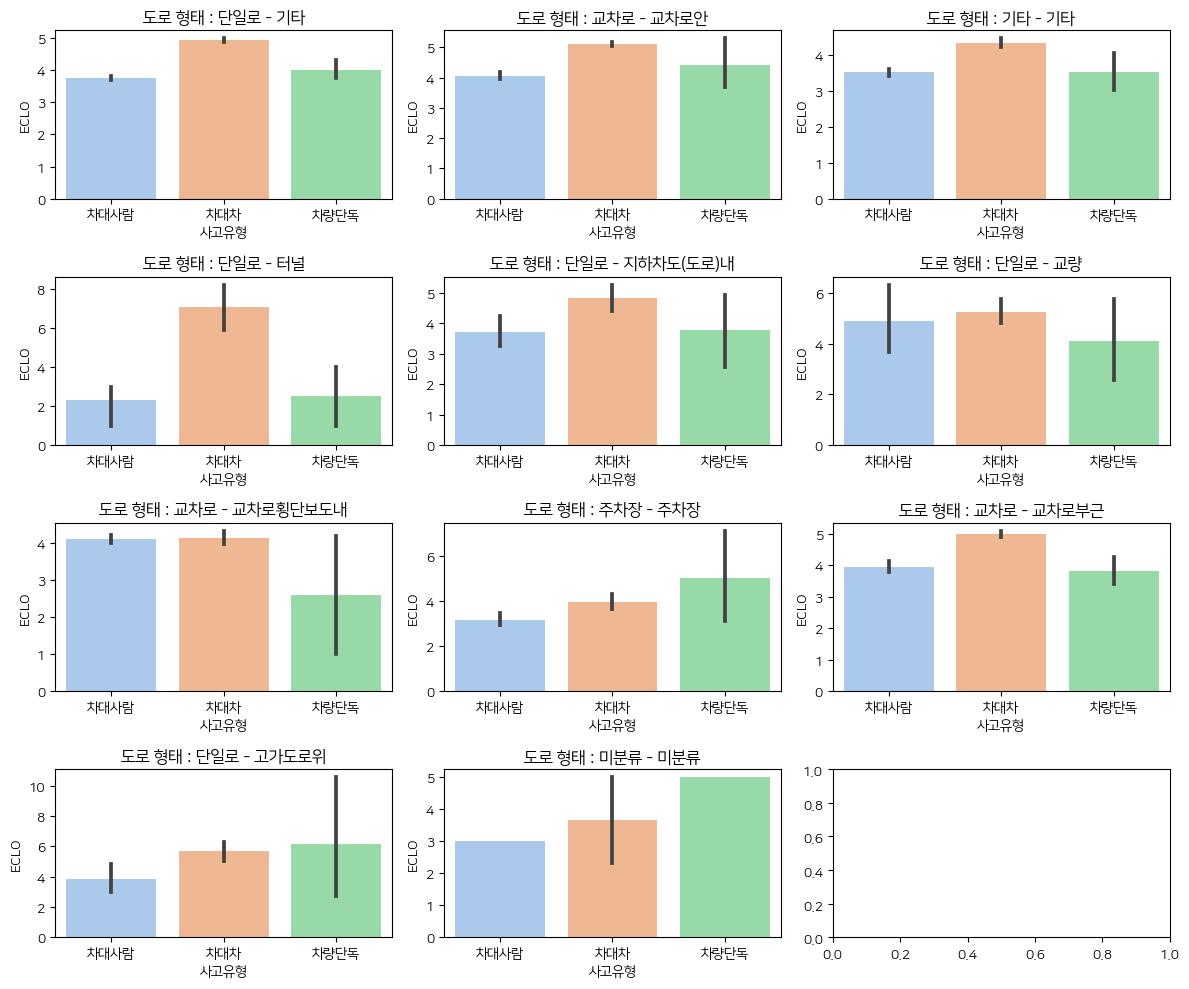

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
palette = sns.color_palette("pastel")
sns.set_palette(palette=palette)
fig, axes = plt.subplots(4, 3, figsize=(12, 10))

# x축 label 순서 맞추기
x_order = train_df["사고유형"].unique()

for (ax, k) in zip(axes.flatten(), train_df["도로형태"].unique()):
    sns.barplot(x="사고유형", y="ECLO", data=train_df[train_df["도로형태"] == k], ax=ax, order=x_order)
    ax.set_title(f"도로 형태 : {k}")

plt.tight_layout()
plt.show()


## 도로 형태에 따른 ECLO 분포
: 단일로-기타와 교차로-교차로부근에서 ECLO가 높은 사고가 발생하였다는 것을 알 수 있다. 

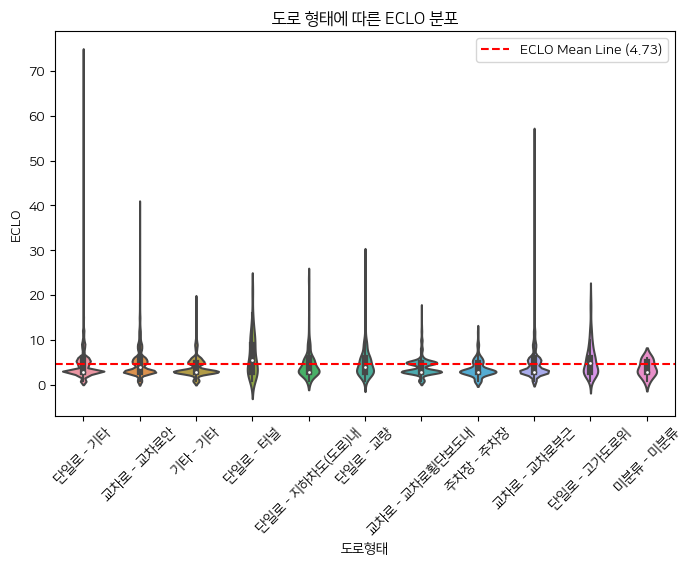

In [8]:

plt.figure(figsize=(8,5))
sns.violinplot(x='도로형태', y='ECLO', data=train_df)
avg = train_df['ECLO'].mean()
plt.axhline(avg, ls='--', color='r', label=f'ECLO Mean Line ({round(avg,2)})')
plt.xticks(rotation=45)
plt.legend()
plt.title("도로 형태에 따른 ECLO 분포")
plt.show()

## 사고 유형에 따른 ECLO 분포
: 차대차 사고에서 ECLO가 높은 사고가 발생하였고, 차대사람에서 ECLO가 낮은 사고가 많이 발생하였다는 것을 알 수 있다. 

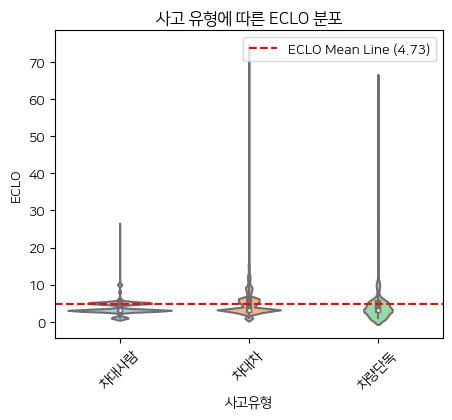

In [9]:
plt.figure(figsize=(5,4))
sns.violinplot(x='사고유형', y='ECLO', data=train_df)
avg = train_df['ECLO'].mean()
plt.axhline(avg, ls='--', color='r', label=f'ECLO Mean Line ({round(avg,2)})')
plt.xticks(rotation=45)
plt.legend()
plt.title("사고 유형에 따른 ECLO 분포")
plt.show()

## 노면 상태에 따른 ECLO 비교
: 노면 상태가 침수인 경우 ECLO(인명피해 심각도)가 높은 것을 알 수 있다.

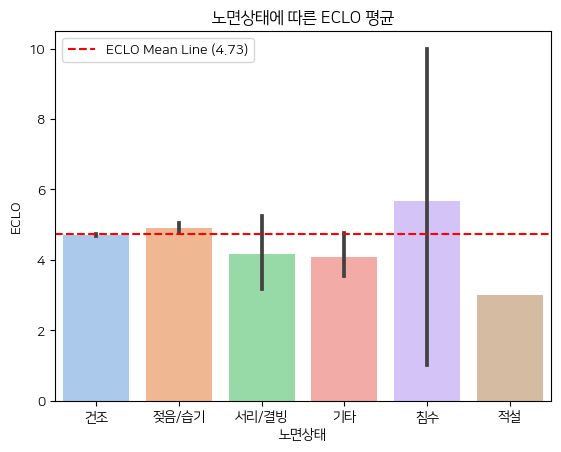

In [10]:
sns.barplot(x='노면상태', y='ECLO', data=train_df)
avg = train_df['ECLO'].mean()
plt.axhline(avg, ls='--', label=f'ECLO Mean Line ({round(avg,2)})', color='r')
plt.legend()
plt.title("노면상태에 따른 ECLO 평균")
plt.show()

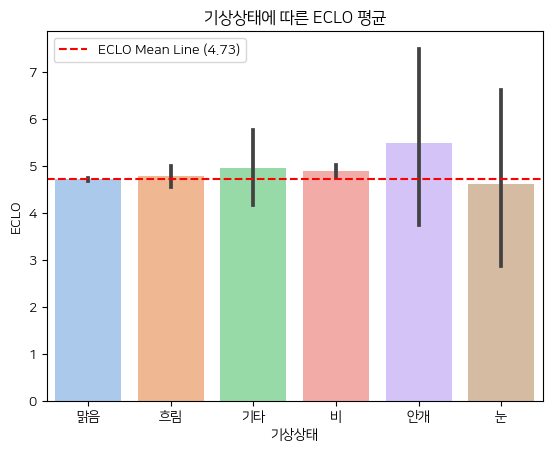

In [11]:
sns.barplot(x='기상상태', y='ECLO', data=train_df)
avg = train_df['ECLO'].mean()
plt.axhline(avg, ls='--', label=f'ECLO Mean Line ({round(avg,2)})', color='r')
plt.legend()
plt.title("기상상태에 따른 ECLO 평균")
plt.show()

## 요일별 ECLO
가능방법
1. 각 요일에 대한 ECLO 평균으로 대입
2. upper bound를 이용, ECLO가 upper bound보다 높은 요일 구하기
3. 

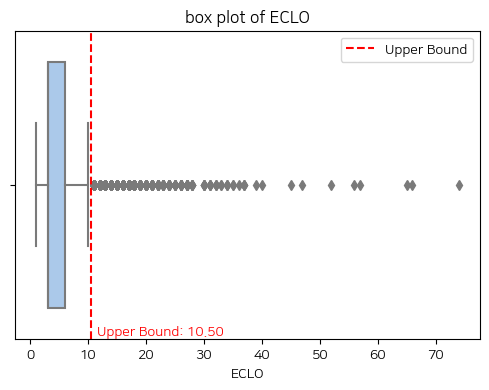

In [12]:
# ECLO upper bound 구하기

Q1 = train_df['ECLO'].quantile(0.25)
Q3 = train_df['ECLO'].quantile(0.75)
IQR = Q3-Q1

upper_bound = Q3 + 1.5 * IQR



plt.figure(figsize=(6,4))
sns.boxplot(x='ECLO', data=train_df)

plt.axvline(x=upper_bound, color='r', linestyle='--', label='Upper Bound')

plt.text(upper_bound+12, 0.5, f'Upper Bound: {upper_bound:.2f}', color='r', ha='center', va='bottom')

plt.legend()

plt.title("box plot of ECLO")
plt.show()

In [13]:
# ECLO 10.5를 기준으로 데이터 분리
high_ECLO_df = train_df[train_df['ECLO'] > 10.5]
no_high_ECLO_df = train_df[train_df['ECLO'] <= 10.5]

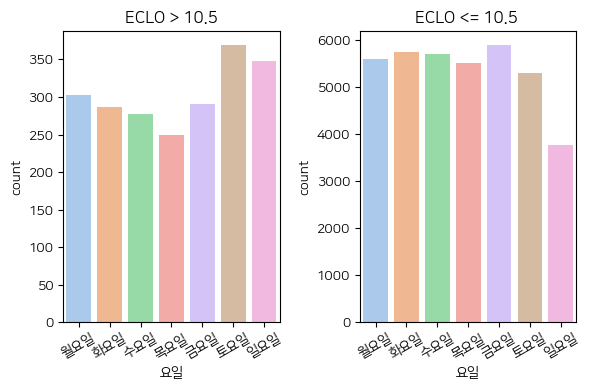

In [14]:
x_order = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']

fig, axes = plt.subplots(1, 2, figsize=(6,4))
sns.countplot(x='요일', data=high_ECLO_df, order=x_order, ax=axes[0])
sns.countplot(x='요일', data=no_high_ECLO_df, order=x_order, ax=axes[1])
axes[0].tick_params(axis='x', rotation=30)
axes[1].tick_params(axis='x', rotation=30)

axes[0].set_title("ECLO > 10.5")
axes[1].set_title("ECLO <= 10.5 ")

plt.tight_layout()
plt.show()

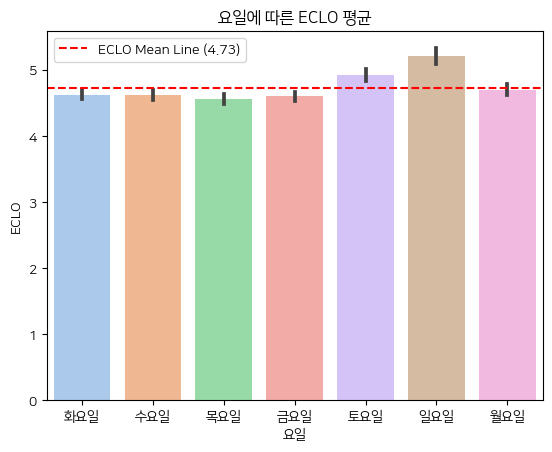

In [15]:
sns.barplot(x='요일', y='ECLO', data=train_df)
avg = train_df['ECLO'].mean()
plt.axhline(avg, ls='--', label=f'ECLO Mean Line ({round(avg,2)})', color='r')
plt.legend()
plt.title("요일에 따른 ECLO 평균")
plt.show()

In [16]:
import folium
m = folium.Map(location=[35.87222,128.60250],zoom_start=13)
m

folium.Choropleth(
    #geo_data='../data/02._us-states.json', # 경계선 좌표값이 담긴 데이터
    #data=train_df, # Series or DataFrame 넣으면 된다
    columns=['시군구', 'ECLO'], # DataFrame의 어떤 columns을 넣을지
    key_on='feature.id', # id 값을 가져오겠다; feature.id : feature 붙여줘야 함 (folium의 정해진 형식)
    fill_color='BuPu',
    fill_opacity=0.5, # 색 투명도
    line_opacity=0.5, # 선 투명도
    legend_name='Unemployment rate (%)' # 범례
).add_to(m)
m

import folium

# 'train_df'에 데이터가 있다고 가정합니다.
# 'YourDataFrame'을 실제 DataFrame의 이름으로 대체해야 합니다.

m = folium.Map(location=[37.5665, 126.9780], zoom_start=7)

folium.Choropleth(
    geo_data='../data/02._us-states.json',  # 여러분의 geo_data 파일 경로로 대체하세요
    data=train_df,  # 여러분의 DataFrame으로 대체하세요
    columns=['시군구', 'ECLO'],  # train_df에서 사용할 열로 대체하세요
    key_on='feature.id',
    fill_color='BuPu',
    fill_opacity=0.5,
    line_opacity=0.5,
    legend_name='실업률 (%)'
).add_to(m)


for i in range(len(mean_df)):
    r = mean_df.iloc[i]['ECLO']*3
    name = mean_df.iloc[i]['시군구'].split(' ')[-2]+mean_df.iloc[i]['시군구'].split(' ')[-1]
    folium.CircleMarker(locations_dict[mean_df.iloc[i]['시군구']],
                        popup=f'{name}',
                        radius=r, color='purple',fill_color='plum',
                        fill=True).add_to(map_daegu)

map_daegu

# CCTV폴더 연결하기

In [17]:
CCTV_org=pd.read_csv("open/external_open/daegu_CCTV.csv",encoding='cp949')
print(CCTV_org.shape)
display(CCTV_org.head())

(1065, 18)


,무인교통단속카메라관리번호,시도명,시군구명,도로종류,도로노선번호,도로노선명,도로노선방향,소재지도로명주소,소재지지번주소,위도,경도,설치장소,단속구분,제한속도,단속구간위치구분,과속단속구간길이,보호구역구분,설치연도
0,주차12,대구광역시,남구,시도,NaN,대명로,3,대구광역시 남구 대명로 162,대구광역시 남구 대명동 903-13,35.838857,128.575418,안지랑네거리1 버스정류장,4,0,NaN,NaN,99.0,2010.0
1,주차13,대구광역시,남구,시도,NaN,봉덕로,3,대구광역시 남구 봉덕로 135,대구광역시 남구 봉덕동 853-8,35.844653,128.604619,효성백년가약,4,0,NaN,NaN,99.0,2013.0
2,주차14,대구광역시,남구,시도,NaN,대봉로,3,대구광역시 남구 봉덕로 134,대구광역시 남구 봉덕동 866-46,35.844183,128.604815,강변코오롱하늘채,4,0,NaN,NaN,99.0,2013.0
3,주차15,대구광역시,남구,시도,NaN,큰골길,3,대구광역시 남구 큰골길 200,대구광역시 남구 대명동 2680-17,35.834798,128.585284,보성청록타운,4,0,NaN,NaN,99.0,2014.0
4,주차16,대구광역시,남구,시도,NaN,큰골길,3,대구광역시 남구 큰골길 243,대구광역시 남구 봉덕동 1616,35.832728,128.588324,환경차고지,4,0,NaN,NaN,99.0,2014.0
